<a href="https://colab.research.google.com/github/lukmanbayhaqi/employee-attrition-eda/blob/master/tb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import hvplot.pandas

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [152]:
employee=pd.read_csv("employee.csv")

In [ ]:
employee.head()

In [ ]:
employee.describe()

In [155]:
employee.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [169]:
y = employee['Attrition']

In [156]:
label = LabelEncoder()
employee["Attrition"] = label.fit_transform(employee.Attrition)

<ipython-input-157-479c8b78e826>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  col = employee.corr().nlargest(20, "Attrition").Attrition.index


<Axes: >

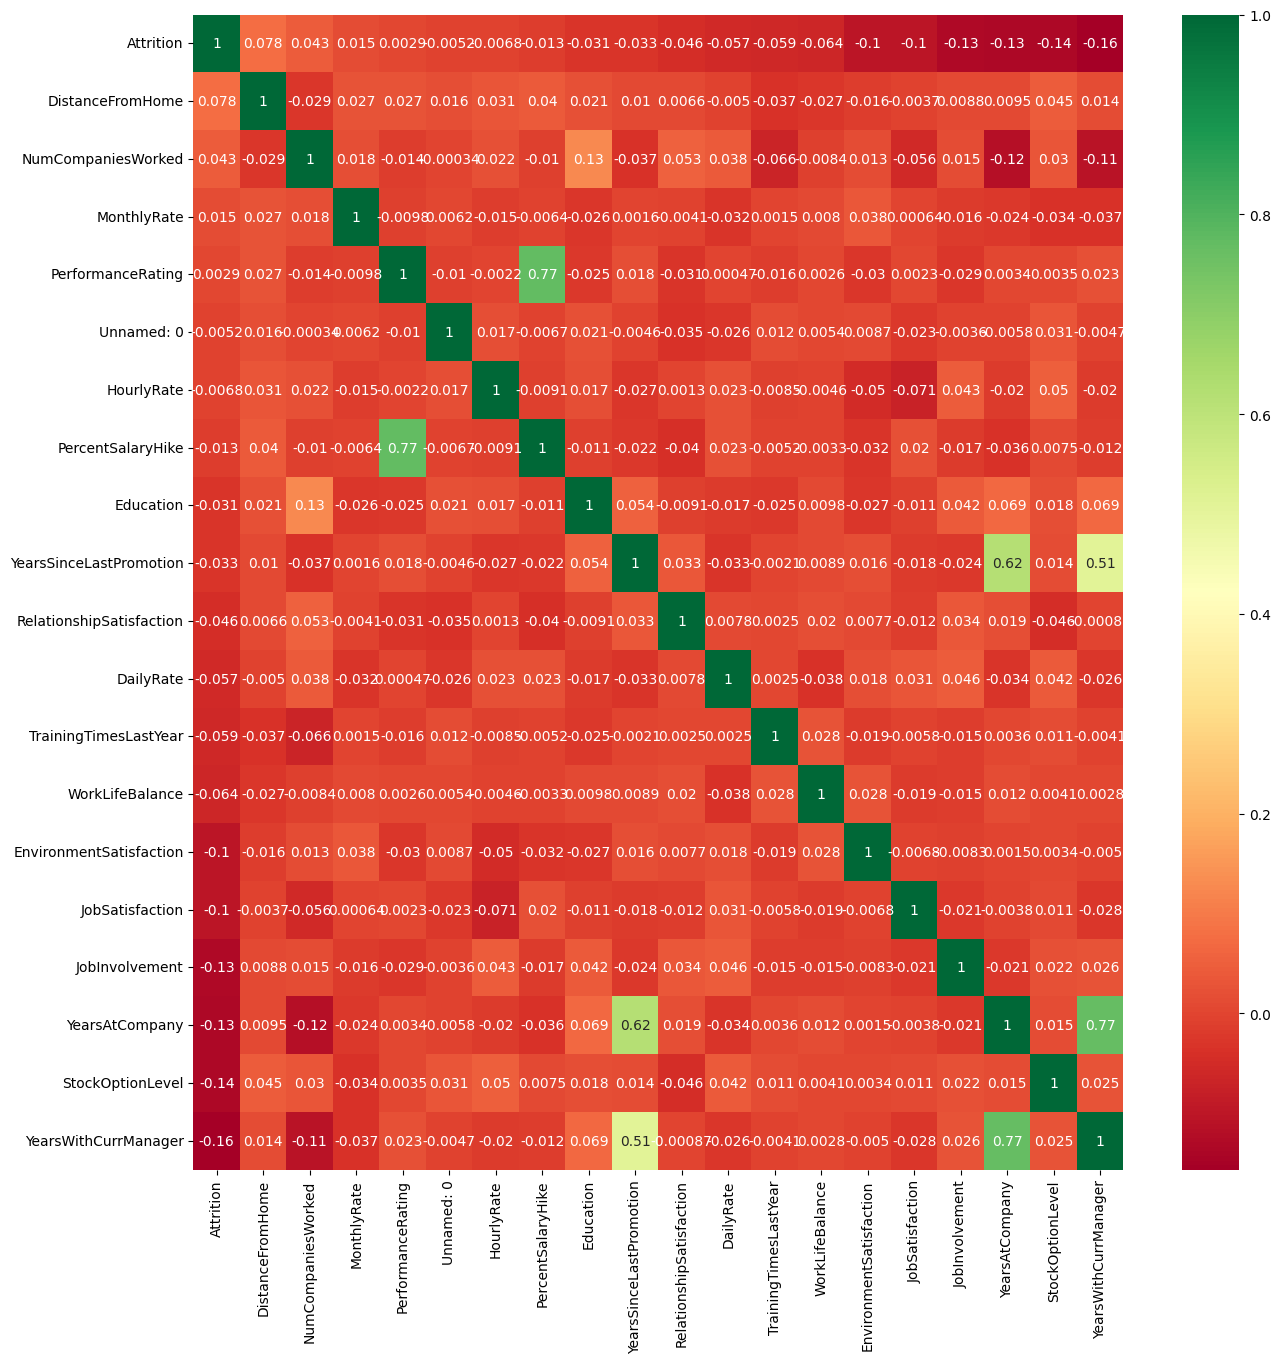

In [157]:
col = employee.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(employee[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

<ipython-input-158-d7230ad4e37e>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  employee.drop('Attrition', axis=1).corrwith(employee.Attrition).plot(kind='barh', figsize=(12.5, 10))


<Axes: >

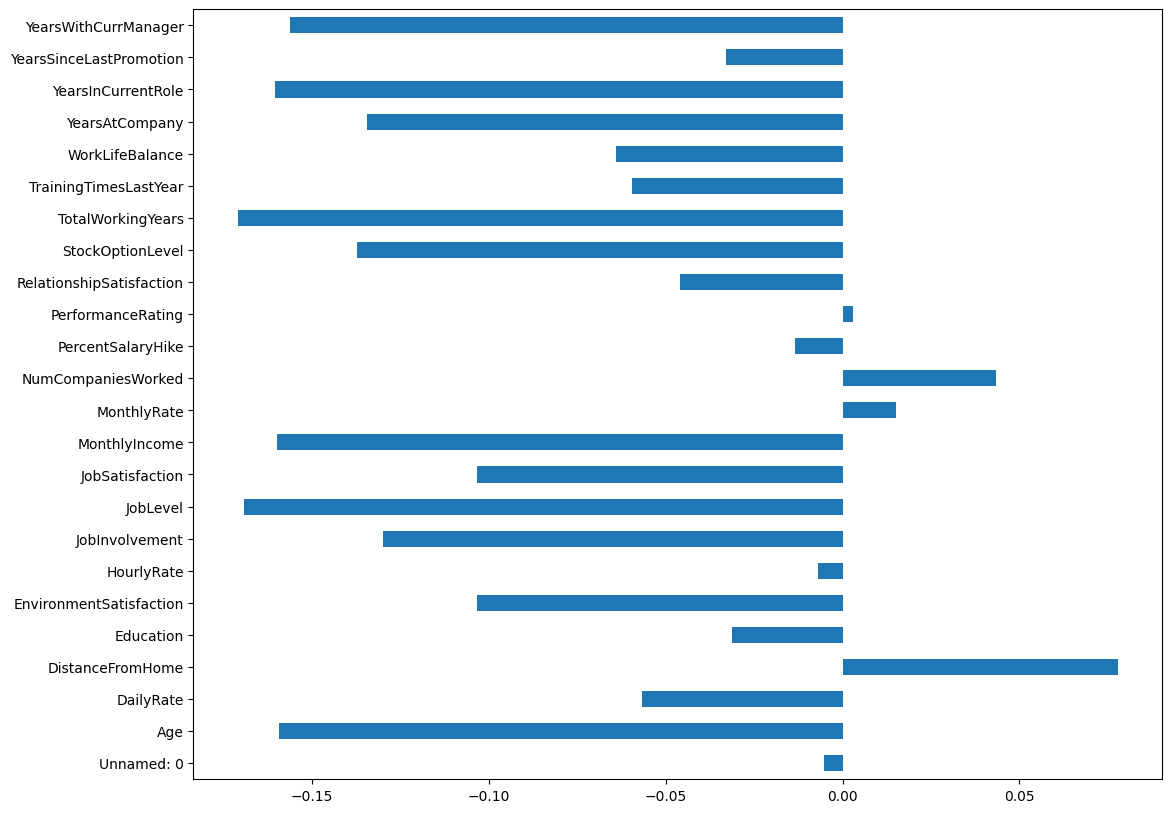

In [158]:
employee.drop('Attrition', axis=1).corrwith(employee.Attrition).plot(kind='barh', figsize=(12.5, 10))

In [159]:
data = pd.get_dummies(employee, columns=[column for column in employee.drop('Attrition', axis=1).columns if employee[column].nunique() < 20], drop_first=True, dtype='uint8')

data = data.T.drop_duplicates()
data = data.T

data.drop_duplicates(inplace=True)

<Axes: >

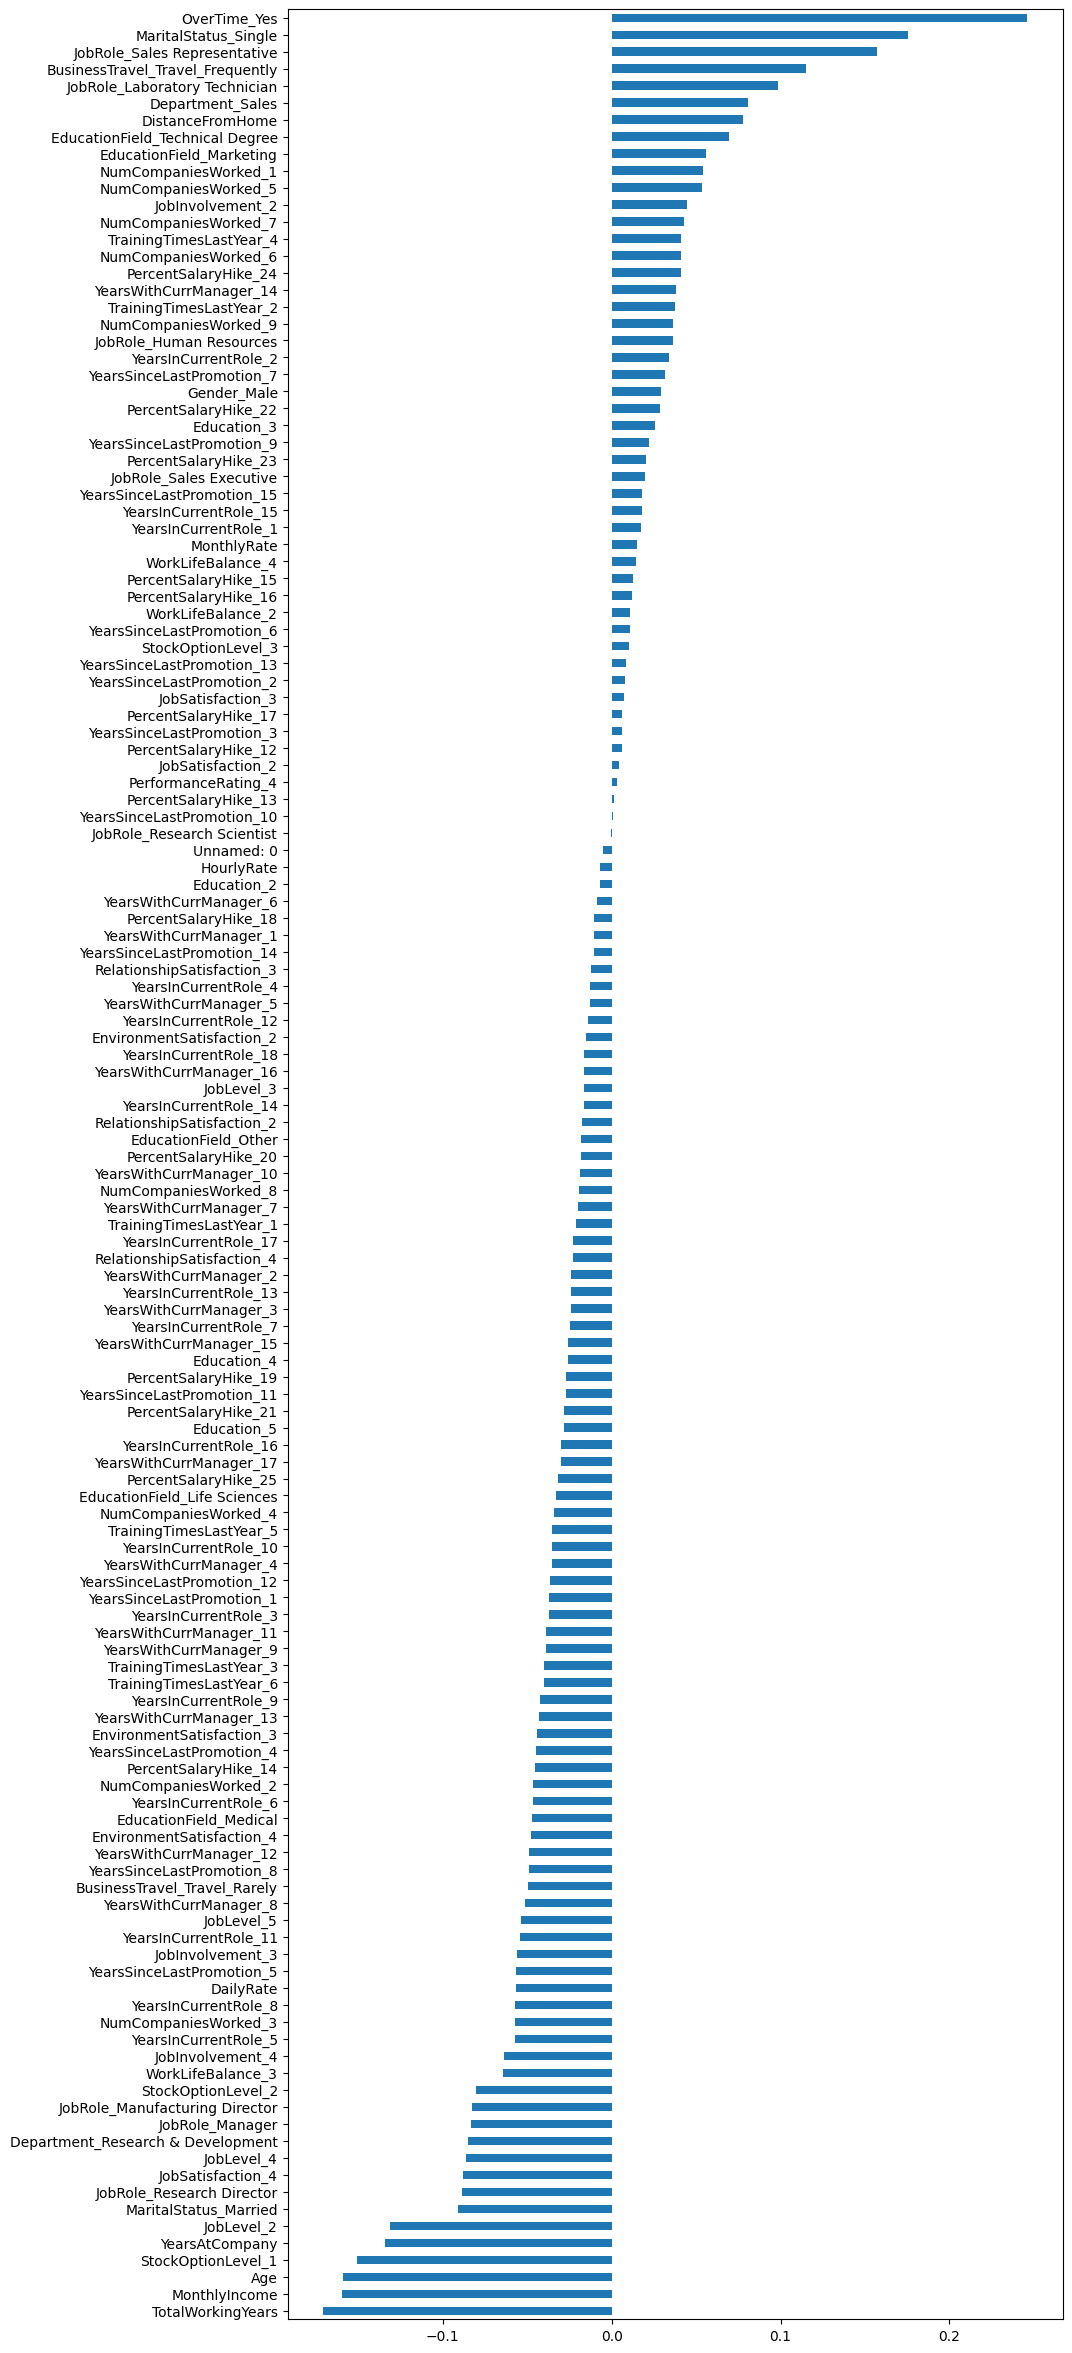

In [160]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [161]:
X = data.drop('Attrition',axis=1)
y = data['Attrition']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [163]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [164]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("TRAIN================================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("\nTEST================================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

TRAIN================================
Staying Rate: 83.87%
Leaving Rate: 16.13%

TEST================================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [165]:
def evaluate(model, X_train, X_test, y_train, y_test):
  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)

  print("TRAINIG RESULTS ===============================")
  report_train = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
  print("CONFUSION MATRIX")
  print(confusion_matrix(y_train, y_train_pred))
  print("ACCURACY SCORE")
  print(f"{accuracy_score(y_train, y_train_pred):.4f}")
  print("CLASSIFICATION REPORT")
  print(report_train)

  print("\nTESTING RESULTS ===============================")
  report_test = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
  print("CONFUSION MATRIX")
  print(confusion_matrix(y_test, y_test_pred))
  print("ACCURACY SCORE")
  print(f"{accuracy_score(y_test, y_test_pred):.4f}")
  print("CLASSIFICATION REPORT")
  print(report_test)

In [166]:
lrClassifier = LogisticRegression(solver='liblinear', penalty='l1')
lrClassifier.fit(X_train_std, y_train)

evaluate(lrClassifier, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS ===============================
CONFUSION MATRIX
[[1685   41]
 [ 118  214]]
ACCURACY SCORE
0.9227
CLASSIFICATION REPORT
                     0           1  accuracy    macro avg  weighted avg
precision     0.934554    0.839216  0.922741     0.886885      0.919173
recall        0.976246    0.644578  0.922741     0.810412      0.922741
f1-score      0.954945    0.729131  0.922741     0.842038      0.918516
support    1726.000000  332.000000  0.922741  2058.000000   2058.000000

TESTING RESULTS ===============================
CONFUSION MATRIX
[[712  28]
 [ 69  73]]
ACCURACY SCORE
0.8900
CLASSIFICATION REPORT
                    0           1  accuracy   macro avg  weighted avg
precision    0.911652    0.722772  0.890023    0.817212      0.881243
recall       0.962162    0.514085  0.890023    0.738123      0.890023
f1-score     0.936226    0.600823  0.890023    0.768525      0.882227
support    740.000000  142.000000  0.890023  882.000000    882.000000


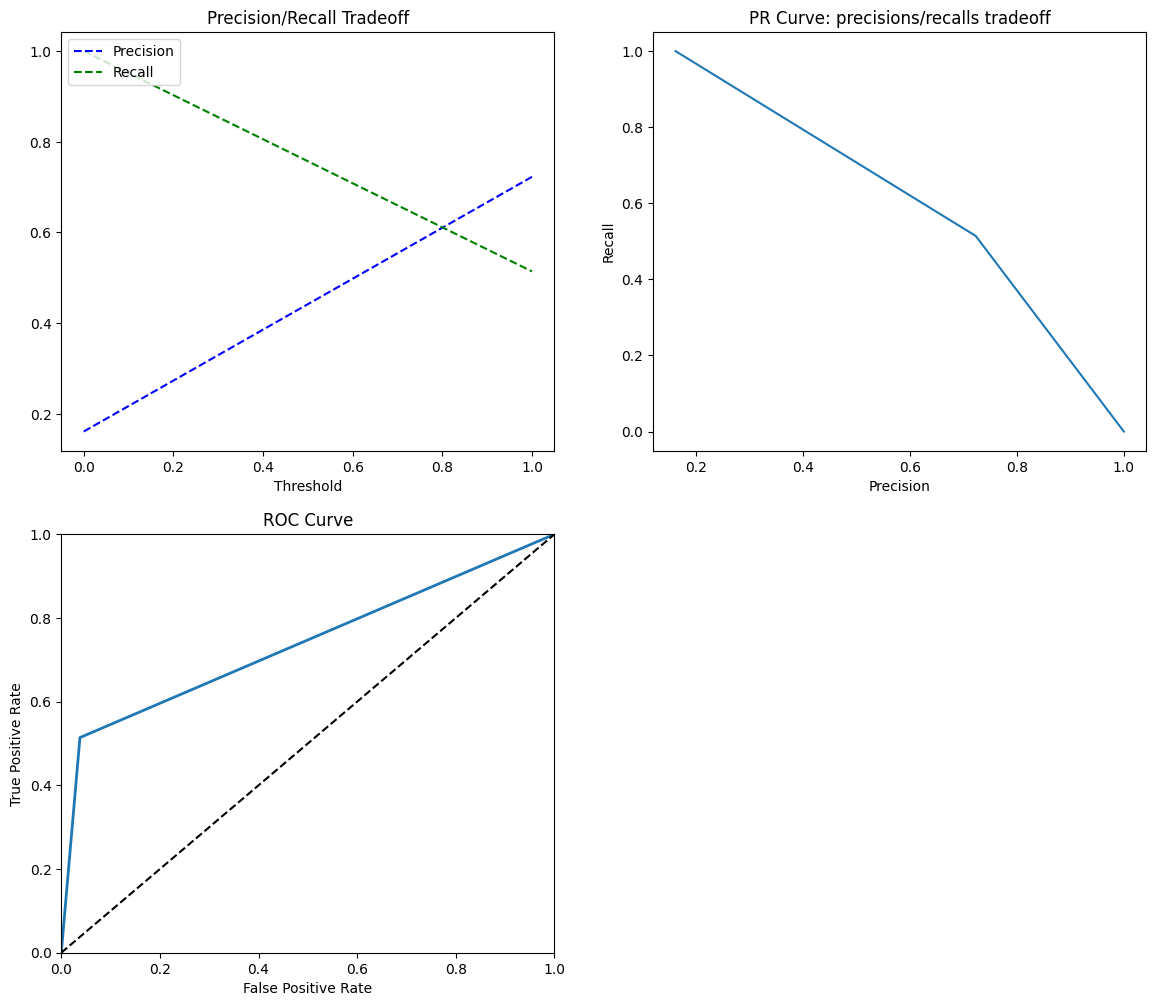

In [167]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

precisions, recalls, thresholds = precision_recall_curve(y_test, lrClassifier.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lrClassifier.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [168]:
print(f"roc_auc_score: {roc_auc_score(y_test, lrClassifier.predict(X_test))}")

roc_auc_score: 0.5883993148077655


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
